In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
def gaussian_kernel(x, x_query, tau):
  return np.exp(- (x- x_query) ** 2 / (2 * tau ** 2))

In [3]:
def locally_weighted_regression(X, y, x_query, tau):
  X_b = np.c_[np.ones(len(X)), X]
  x_query_b = np.array([1, x_query])
  W = np.diag(gaussian_kernel(X, x_query, tau))
  theta = np.linalg.pinv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
  return x_query_b @ theta

In [4]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 3, 2, 4, 3.5, 5, 6, 7, 6.5, 8])
X_query = np.linspace(1, 10, 100)
tau_values = [0.1, 0.5, 1.0, 5.0, 10.0]
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1, 1), y)
y_lin = lin_reg.predict(X_query.reshape(-1, 1))

Text(0, 0.5, 'Y')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65535 (\uffff) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65535 (\uffff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


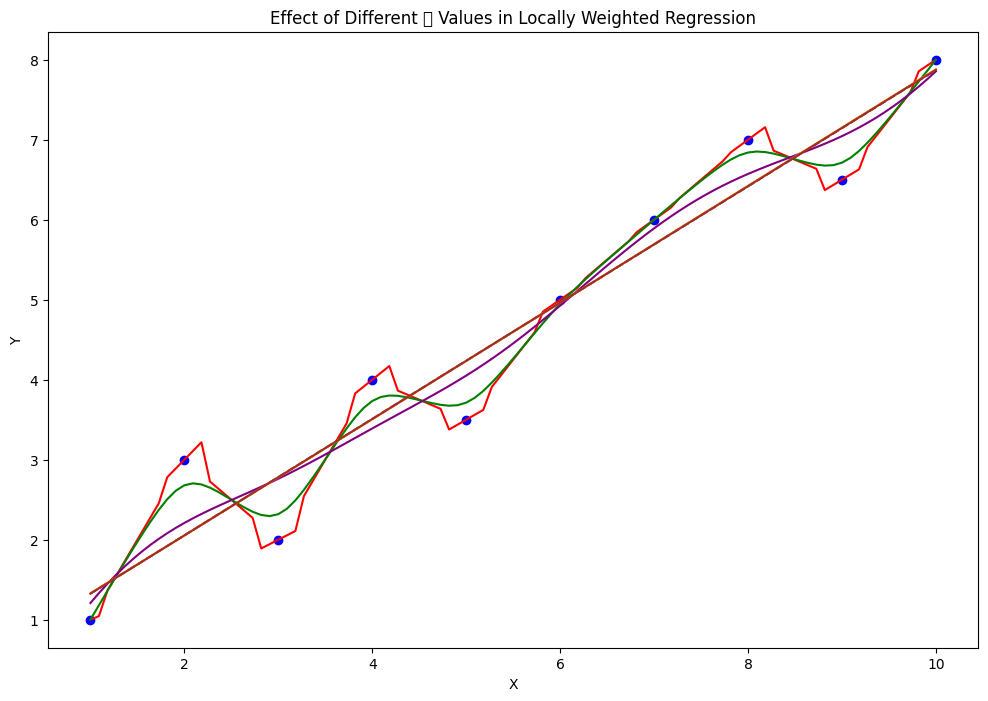

In [5]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_query, y_lin, color='black', linestyle='dashed', label='Simple Linear Regression')
colors = ['red', 'green', 'purple', 'orange', 'brown']
for tau, color in zip(tau_values, colors):
  y_lwr = np.array([locally_weighted_regression(X, y, x_q, tau) for x_q in X_query])
  plt.plot(X_query, y_lwr, color=color, label=f'LWR (￿={tau})')
plt.title("Effect of Different ￿ Values in Locally Weighted Regression")
plt.xlabel("X")
plt.ylabel("Y")